In [12]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from dotenv import load_dotenv
import os
# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])

#rename columns
df.rename(columns={'Working Professional or Student': 'Working Student', 'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts', 'Family History of Mental Illness':'Family Mental Illness' }, inplace=True)

# Convert all column names to snake_case
df.columns = (
    df.columns
    .str.strip()                              # remove leading/trailing spaces
    .str.replace(' ', '_')                    # replace spaces with underscores
    .str.replace('[^A-Za-z0-9_]+', '', regex=True)  # remove special characters
    .str.lower()            
                      # convert to lowercase (optional)
)

# View result
df.head()

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [13]:
#Drop names beacuse not needed for prediction
df = df.drop(columns=['name'])
#Missing values
for col in df.columns:
  if df[col].dtype in ['float64', 'int64']:
    #Convert numeric nulls to mean of col
    df[col]=df[col].fillna(df[col].mean())
  else:
    #Convert categorical to most frequent
    df[col] = df[col].fillna(df[col].mode()[0])
#Convert categorical data to numeric
label_enc = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = label_enc.fit_transform(df[col])
df.head(5)

,id,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,0,49.0,50,1,10,3.142273,5.000000,7.658636,2.94494,2.000000,29,7,33,0,1.0,2.0,0,0
1,1,1,26.0,93,1,55,3.142273,4.000000,7.658636,2.94494,3.000000,27,20,63,1,7.0,3.0,0,1
2,2,1,33.0,97,0,55,5.000000,2.998998,8.970000,2.00000,2.974404,15,7,21,1,3.0,1.0,0,1
3,3,1,22.0,64,1,55,3.142273,5.000000,7.658636,2.94494,1.000000,27,15,28,1,10.0,1.0,1,1
4,4,0,30.0,37,1,9,3.142273,1.000000,7.658636,2.94494,1.000000,15,20,28,1,9.0,4.0,1,0


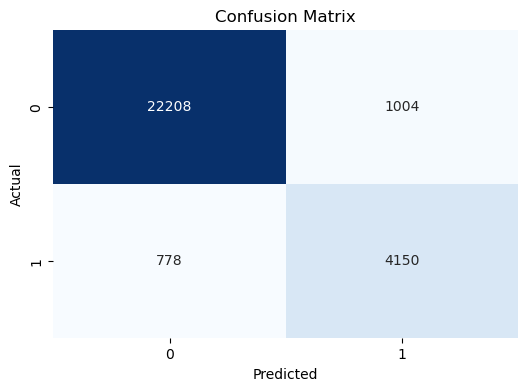

In [14]:
from OurModels import LogisticRegressionModel
model = LogisticRegressionModel()
results = model.train(df)
cnf_matrix = metrics.confusion_matrix(*results)

